In [158]:
import glob
import json
import keras
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
from keras import regularizers
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Activation, Dropout, Flatten, Dense, Input, BatchNormalization
from keras.models import Model, model_from_json
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from librosa.util import lazy
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer


In [18]:
mylist= os.listdir('RawData/')
mylist

['03-01-01-01-01-01-01.wav',
 '03-01-01-01-01-01-02.wav',
 '03-01-01-01-01-01-03.wav',
 '03-01-01-01-01-01-04.wav',
 '03-01-01-01-01-01-05.wav',
 '03-01-01-01-01-01-06.wav',
 '03-01-01-01-01-01-07.wav',
 '03-01-01-01-01-01-08.wav',
 '03-01-01-01-01-01-09.wav',
 '03-01-01-01-01-01-10.wav',
 '03-01-01-01-01-01-11.wav',
 '03-01-01-01-01-01-12.wav',
 '03-01-01-01-01-01-13.wav',
 '03-01-01-01-01-01-14.wav',
 '03-01-01-01-01-01-15.wav',
 '03-01-01-01-01-01-16.wav',
 '03-01-01-01-01-01-17.wav',
 '03-01-01-01-01-01-18.wav',
 '03-01-01-01-01-01-19.wav',
 '03-01-01-01-01-01-20.wav',
 '03-01-01-01-01-01-21.wav',
 '03-01-01-01-01-01-22.wav',
 '03-01-01-01-01-01-23.wav',
 '03-01-01-01-01-01-24.wav',
 '03-01-01-01-01-02-01.wav',
 '03-01-01-01-01-02-02.wav',
 '03-01-01-01-01-02-03.wav',
 '03-01-01-01-01-02-04.wav',
 '03-01-01-01-01-02-05.wav',
 '03-01-01-01-01-02-06.wav',
 '03-01-01-01-01-02-07.wav',
 '03-01-01-01-01-02-08.wav',
 '03-01-01-01-01-02-09.wav',
 '03-01-01-01-01-02-10.wav',
 '03-01-01-01-

In [19]:
print(mylist[4239])
print(mylist[1151][6:-16])
print(mylist[1151][18:-4])

YAF_youth_sad.wav
07
24


In [20]:
feeling_list=[]
est_animo=[]
# Lista de palabras a seleccionar
selected_emotion = ["neutral", "happy", "sad", "angry", "fear", "disgust", "ps"]

for item in mylist:

    #Se extrae el estado de animo del titulo del archivo del dataset TESS:
    nombre_base, _ = os.path.splitext(item)
    segundo_guion_posicion = nombre_base.find("_", 4)
    if segundo_guion_posicion != -1:
        est_animo = nombre_base[(segundo_guion_posicion+1):len(nombre_base)]
        # print(est_animo)

    #Se asigna los estados de animo del Dataset TESS:
    if est_animo == selected_emotion[0]:
        feeling_list.append('female_neutral')
    elif est_animo == selected_emotion[1]:
        feeling_list.append('female_happy')
    elif est_animo == selected_emotion[2]:
        feeling_list.append('female_sad')
    elif est_animo == selected_emotion[3]:
        feeling_list.append('female_angry')
    elif est_animo == selected_emotion[4]:
        feeling_list.append('female_fearful')
    elif est_animo == selected_emotion[5]:
        feeling_list.append('female_disgust')
    elif est_animo == selected_emotion[6]:
        feeling_list.append('female_surprised')

    #Se asigna los estados de animo del Dataset RAVNESS:
    if item[6:-16]=='01' and int(item[18:-4])%2==0:
        feeling_list.append('female_neutral')
    elif item[6:-16]=='01' and int(item[18:-4])%2==1:
        feeling_list.append('male_neutral')
    elif item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_neutral') #Se integra "neutral" con "calm"
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_neutral') #Se integra "neutral" con "calm"
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[6:-16]=='07' and int(item[18:-4])%2==0:
        feeling_list.append('female_disgust')
    elif item[6:-16]=='07' and int(item[18:-4])%2==1:
        feeling_list.append('male_disgust')
    elif item[6:-16]=='08' and int(item[18:-4])%2==0:
        feeling_list.append('female_surprised')
    elif item[6:-16]=='08' and int(item[18:-4])%2==1:
        feeling_list.append('male_surprised')

In [21]:
feeling_list

['male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'male_neutral',
 'female_ne

In [82]:
labels = pd.DataFrame(feeling_list)
labelss=labels.rename(columns={0: 'Emotions'}) #Se renombra el título de la columna
labelss[:4240]

,Emotions
0,male_neutral
1,female_neutral
2,male_neutral
3,female_neutral
4,male_neutral
...,...
4235,female_fearful
4236,female_happy
4237,female_neutral
4238,female_surprised


## Obtención de las características de los archivos de audio con Librosa

In [83]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    X, sample_rate = librosa.load('RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)   #El número de coeficientes mfcc está relacionado con la frecuencia de muestreo de la señal de audio. Se recomienda extraer un número de coeficientes mfcc igual a un cuarto de la frecuencia de muestreo dividida por 13.29. En nuestro caso, hemos cogido 13 coeficientes MFCC al tratarse de una práctica común y ampliamente utilizada, basada en estudios que sugieren que este número captura adecuadamente la información perceptivamente relevante del espectro de audio para tareas como el reconocimiento de voz y la clasificación de emociones.
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1        

In [86]:
#Se muestran los resultados agrupados en la columna "feature":
df[:4240]

,feature
0,"[-65.801285, -65.801285, -65.801285, -65.80128..."
1,"[-63.214157, -63.214157, -63.214157, -63.21415..."
2,"[-60.258987, -60.258987, -60.258987, -60.25898..."
3,"[-66.48846, -66.48846, -66.48846, -66.48846, -..."
4,"[-62.027878, -60.52594, -64.739456, -66.27164,..."
...,...
4235,"[-16.762005, -19.360477, -23.19142, -21.32961,..."
4236,"[-15.918091, -19.990038, -28.71327, -25.986973..."
4237,"[-13.5176325, -16.127287, -22.515636, -21.8750..."
4238,"[-33.651505, -32.689236, -30.41676, -31.138609..."


In [89]:
#Se crea la copia "df2" del DataFrame de pandas (df) separando individualmente los resultados de la columna "feature":
df2 = pd.DataFrame(df['feature'].values.tolist())
df2[:4240]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,...,-58.300411,-62.295700,-64.930496,-65.332520,-64.117332,-64.320320,-64.971794,-63.156208,-64.258797,-64.468193
1,-63.214157,-63.214157,-63.214157,-63.214157,-63.214157,-63.167240,-63.385445,-63.461830,-63.336105,-63.204216,...,-50.994545,-53.428989,-53.139889,-52.854271,-55.248135,-57.682434,-57.166496,-57.040077,-56.105301,-59.386353
2,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,...,-51.362526,-50.511784,-49.082012,-47.701584,-48.795414,-52.424294,-54.828476,-52.233757,-49.679409,-49.952641
3,-66.488457,-66.488457,-66.488457,-66.488457,-66.488457,-66.488457,-66.527412,-66.554977,-66.534813,-66.488457,...,-61.150002,-62.122272,-64.444450,-65.315735,-65.285492,-65.365860,-64.971207,-64.157776,-64.913437,-66.488457
4,-62.027878,-60.525940,-64.739456,-66.271637,-61.207905,-60.241585,-62.637955,-63.144920,-60.527340,-59.102253,...,-54.662369,-54.736412,-50.871803,-51.928799,-56.389351,-57.153385,-54.602703,-54.804359,-60.364048,-64.864937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-16.762005,-19.360477,-23.191420,-21.329611,-19.423271,-19.665398,-22.673809,-22.284254,-20.234264,-13.958710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4236,-15.918091,-19.990038,-28.713270,-25.986973,-25.972464,-26.641499,-28.661919,-25.998650,-22.204659,-19.273245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4237,-13.517632,-16.127287,-22.515636,-21.875023,-21.739693,-22.734480,-23.940634,-24.164192,-23.348896,-23.856966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4238,-33.651505,-32.689236,-30.416759,-31.138609,-28.375069,-25.812765,-24.708422,-26.774479,-28.786011,-28.176048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#Se crea un nuevo dataframe "Newdf" y se concatena el "df2" y el "labels":
newdf = pd.concat([df2,labelss], axis=1)
newdf[:4240]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,Emotions
0,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,...,-62.295700,-64.930496,-65.332520,-64.117332,-64.320320,-64.971794,-63.156208,-64.258797,-64.468193,male_neutral
1,-63.214157,-63.214157,-63.214157,-63.214157,-63.214157,-63.167240,-63.385445,-63.461830,-63.336105,-63.204216,...,-53.428989,-53.139889,-52.854271,-55.248135,-57.682434,-57.166496,-57.040077,-56.105301,-59.386353,female_neutral
2,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,...,-50.511784,-49.082012,-47.701584,-48.795414,-52.424294,-54.828476,-52.233757,-49.679409,-49.952641,male_neutral
3,-66.488457,-66.488457,-66.488457,-66.488457,-66.488457,-66.488457,-66.527412,-66.554977,-66.534813,-66.488457,...,-62.122272,-64.444450,-65.315735,-65.285492,-65.365860,-64.971207,-64.157776,-64.913437,-66.488457,female_neutral
4,-62.027878,-60.525940,-64.739456,-66.271637,-61.207905,-60.241585,-62.637955,-63.144920,-60.527340,-59.102253,...,-54.736412,-50.871803,-51.928799,-56.389351,-57.153385,-54.602703,-54.804359,-60.364048,-64.864937,male_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-16.762005,-19.360477,-23.191420,-21.329611,-19.423271,-19.665398,-22.673809,-22.284254,-20.234264,-13.958710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_fearful
4236,-15.918091,-19.990038,-28.713270,-25.986973,-25.972464,-26.641499,-28.661919,-25.998650,-22.204659,-19.273245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_happy
4237,-13.517632,-16.127287,-22.515636,-21.875023,-21.739693,-22.734480,-23.940634,-24.164192,-23.348896,-23.856966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_neutral
4238,-33.651505,-32.689236,-30.416759,-31.138609,-28.375069,-25.812765,-24.708422,-26.774479,-28.786011,-28.176048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_surprised


In [100]:
#Se realiza una mezcla de todas las muestras aleatoriamente:
rnewdf = shuffle(newdf)
rnewdf[:4240]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,Emotions
2345,-18.634993,-21.277071,-31.236559,-30.768806,-31.223845,-32.991364,-32.766460,-31.486855,-31.346102,-32.159805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_fearful
1252,-61.768551,-60.107037,-59.357864,-59.050819,-58.001987,-58.968857,-58.439819,-56.480225,-56.491543,-60.217304,...,-43.032768,-44.087097,-46.726040,-46.683388,-47.866867,-48.290379,-47.877113,-46.121719,-46.861324,male_surprised
1140,-69.376717,-69.376717,-69.376717,-67.160477,-66.278244,-67.912323,-69.376717,-64.728615,-64.098053,-69.113068,...,-61.288731,-59.080101,-60.681759,-64.237984,-65.734848,-63.060505,-63.231331,-65.115776,-61.558147,male_disgust
1783,-22.180012,-24.237619,-31.667265,-29.734486,-30.120188,-30.443634,-31.518288,-32.667599,-32.438805,-31.925524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_angry
2482,-19.895536,-23.410248,-31.417616,-31.751217,-32.763039,-34.880554,-32.770557,-32.884373,-32.950989,-32.418144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,-20.211971,-24.198713,-30.562626,-28.722197,-27.848192,-27.794838,-27.345629,-27.844036,-29.131664,-30.928946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_neutral
2882,-15.957082,-19.494068,-28.183882,-28.192211,-28.863386,-26.132267,-26.064249,-27.527353,-28.301685,-29.889605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_angry
1738,-19.087536,-20.358255,-27.664852,-29.467922,-31.254921,-29.611403,-29.180559,-28.894217,-28.660616,-28.857634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_neutral
3498,-19.665773,-22.931515,-26.472948,-26.501038,-28.206861,-27.859907,-29.711906,-29.933500,-26.906809,-24.894741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_angry


In [102]:
#Se rellenan todos los valores nulos (NaN) del DataFrame "rnewdf" con el valor 0:
rnewdf=rnewdf.fillna(0)
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,Emotions
2345,-18.634993,-21.277071,-31.236559,-30.768806,-31.223845,-32.991364,-32.766460,-31.486855,-31.346102,-32.159805,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_fearful
1252,-61.768551,-60.107037,-59.357864,-59.050819,-58.001987,-58.968857,-58.439819,-56.480225,-56.491543,-60.217304,...,-43.032768,-44.087097,-46.726040,-46.683388,-47.866867,-48.290379,-47.877113,-46.121719,-46.861324,male_surprised
1140,-69.376717,-69.376717,-69.376717,-67.160477,-66.278244,-67.912323,-69.376717,-64.728615,-64.098053,-69.113068,...,-61.288731,-59.080101,-60.681759,-64.237984,-65.734848,-63.060505,-63.231331,-65.115776,-61.558147,male_disgust
1783,-22.180012,-24.237619,-31.667265,-29.734486,-30.120188,-30.443634,-31.518288,-32.667599,-32.438805,-31.925524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_angry
2482,-19.895536,-23.410248,-31.417616,-31.751217,-32.763039,-34.880554,-32.770557,-32.884373,-32.950989,-32.418144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,-20.211971,-24.198713,-30.562626,-28.722197,-27.848192,-27.794838,-27.345629,-27.844036,-29.131664,-30.928946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_neutral
2882,-15.957082,-19.494068,-28.183882,-28.192211,-28.863386,-26.132267,-26.064249,-27.527353,-28.301685,-29.889605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_angry
1738,-19.087536,-20.358255,-27.664852,-29.467922,-31.254921,-29.611403,-29.180559,-28.894217,-28.660616,-28.857634,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_neutral
3498,-19.665773,-22.931515,-26.472948,-26.501038,-28.206861,-27.859907,-29.711906,-29.933500,-26.906809,-24.894741,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_angry


## División de los datos para test y train

In [103]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [105]:
train[0:3413]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,Emotions
2345,-18.634993,-21.277071,-31.236559,-30.768806,-31.223845,-32.991364,-32.766460,-31.486855,-31.346102,-32.159805,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_fearful
1252,-61.768551,-60.107037,-59.357864,-59.050819,-58.001987,-58.968857,-58.439819,-56.480225,-56.491543,-60.217304,...,-43.032768,-44.087097,-46.726040,-46.683388,-47.866867,-48.290379,-47.877113,-46.121719,-46.861324,male_surprised
1140,-69.376717,-69.376717,-69.376717,-67.160477,-66.278244,-67.912323,-69.376717,-64.728615,-64.098053,-69.113068,...,-61.288731,-59.080101,-60.681759,-64.237984,-65.734848,-63.060505,-63.231331,-65.115776,-61.558147,male_disgust
1783,-22.180012,-24.237619,-31.667265,-29.734486,-30.120188,-30.443634,-31.518288,-32.667599,-32.438805,-31.925524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_angry
2482,-19.895536,-23.410248,-31.417616,-31.751217,-32.763039,-34.880554,-32.770557,-32.884373,-32.950989,-32.418144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,-20.276224,-22.323734,-20.562206,-18.876513,-20.207338,-22.429131,-20.959555,-21.171373,-24.396397,-25.263563,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_happy
2882,-15.957082,-19.494068,-28.183882,-28.192211,-28.863386,-26.132267,-26.064249,-27.527353,-28.301685,-29.889605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_angry
1738,-19.087536,-20.358255,-27.664852,-29.467922,-31.254921,-29.611403,-29.180559,-28.894217,-28.660616,-28.857634,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_neutral
3498,-19.665773,-22.931515,-26.472948,-26.501038,-28.206861,-27.859907,-29.711906,-29.933500,-26.906809,-24.894741,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_angry


In [108]:
#Se retira la columna "Emotions" para entrenar los datos métricos independientemente:
trainfeatures = train.iloc[:, :-1]
trainfeatures[:3413]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
2345,-18.634993,-21.277071,-31.236559,-30.768806,-31.223845,-32.991364,-32.766460,-31.486855,-31.346102,-32.159805,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1252,-61.768551,-60.107037,-59.357864,-59.050819,-58.001987,-58.968857,-58.439819,-56.480225,-56.491543,-60.217304,...,-42.925838,-43.032768,-44.087097,-46.726040,-46.683388,-47.866867,-48.290379,-47.877113,-46.121719,-46.861324
1140,-69.376717,-69.376717,-69.376717,-67.160477,-66.278244,-67.912323,-69.376717,-64.728615,-64.098053,-69.113068,...,-62.423489,-61.288731,-59.080101,-60.681759,-64.237984,-65.734848,-63.060505,-63.231331,-65.115776,-61.558147
1783,-22.180012,-24.237619,-31.667265,-29.734486,-30.120188,-30.443634,-31.518288,-32.667599,-32.438805,-31.925524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2482,-19.895536,-23.410248,-31.417616,-31.751217,-32.763039,-34.880554,-32.770557,-32.884373,-32.950989,-32.418144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,-20.276224,-22.323734,-20.562206,-18.876513,-20.207338,-22.429131,-20.959555,-21.171373,-24.396397,-25.263563,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2882,-15.957082,-19.494068,-28.183882,-28.192211,-28.863386,-26.132267,-26.064249,-27.527353,-28.301685,-29.889605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1738,-19.087536,-20.358255,-27.664852,-29.467922,-31.254921,-29.611403,-29.180559,-28.894217,-28.660616,-28.857634,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3498,-19.665773,-22.931515,-26.472948,-26.501038,-28.206861,-27.859907,-29.711906,-29.933500,-26.906809,-24.894741,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [110]:
#Se separa la columna "Emotions" respectivamente:
trainlabel = train.iloc[:, -1:]
trainlabel[:3413]

,Emotions
2345,female_fearful
1252,male_surprised
1140,male_disgust
1783,female_angry
2482,female_sad
...,...
3662,female_happy
2882,female_angry
1738,female_neutral
3498,female_angry


In [117]:
#Se retira la columna "Emotions" para testear los datos métricos independientemente:
testfeatures = test.iloc[:, :-1]
testfeatures[:827]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
1054,-57.722996,-57.722996,-57.722996,-57.722996,-57.722996,-57.722996,-57.722996,-57.722996,-57.722996,-57.722996,...,-51.018826,-51.297634,-50.895882,-51.883198,-52.043659,-49.373737,-49.317768,-50.513283,-50.786526,-51.805473
2122,-22.436901,-26.527719,-32.214108,-31.822752,-29.130669,-29.046236,-28.830946,-29.333523,-27.442406,-25.348392,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3333,-20.046633,-22.240791,-24.763401,-20.127525,-19.468004,-21.317204,-23.429457,-25.667347,-23.306034,-25.635252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1084,-60.471939,-57.941948,-57.512375,-58.962631,-59.579288,-59.150051,-58.907612,-60.862576,-64.777763,-63.717037,...,-28.721560,-27.800528,-28.585960,-28.794443,-28.472086,-28.831978,-29.279013,-29.600460,-31.638042,-33.311852
3862,-15.243157,-18.384377,-27.906067,-27.952343,-27.646267,-28.427692,-28.399010,-27.815502,-28.350538,-29.473860,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,-9.763885,-12.094488,-21.748932,-21.743935,-22.225559,-22.403130,-22.280836,-21.748945,-21.881361,-21.219473,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
196,-60.447815,-59.109768,-60.991390,-65.156113,-61.927040,-60.033447,-62.115398,-68.920403,-73.610298,-72.389114,...,-29.911694,-30.157856,-29.914558,-30.133339,-30.793976,-31.926800,-33.407005,-35.469387,-39.574989,-41.085369
2171,-20.647871,-23.551645,-29.297039,-27.797890,-25.268902,-24.922054,-24.395638,-23.586483,-24.201029,-24.539785,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
543,-64.336685,-64.336685,-57.387367,-54.829445,-60.108639,-63.158562,-63.970303,-63.356655,-64.336685,-64.336685,...,-59.646610,-61.941772,-61.124729,-60.720135,-62.290794,-61.699333,-62.313168,-63.798576,-60.606853,-59.836014


In [116]:
#Se separa la columna "Emotions" respectivamente:
testlabel = test.iloc[:, -1:]
testlabel[:827]

,Emotions
1054,male_fearful
2122,female_happy
3333,female_happy
1084,male_disgust
3862,female_angry
...,...
3775,female_neutral
196,male_neutral
2171,female_happy
543,female_sad


In [119]:
#Se convierte a arrays de NumPy:
X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

#Se codifican las etiquetas:
lb = LabelEncoder()

#Se transforman y categorizan las etiquetas:
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

c:\Users\diego\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
X_train.shape

(3413, 216)

## Redimensiób del Modelo CNN:

In [122]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [131]:
# Se define el modelo:
model = Sequential()

# model.add(Conv1D(256, 5,padding='same',
#                  input_shape=(216,1)))
# model.add(Activation('relu'))
# model.add(Conv1D(128, 5,padding='same'))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))
# model.add(MaxPooling1D(pool_size=(8)))
# model.add(Conv1D(128, 5,padding='same',))
# model.add(Activation('relu'))
# #model.add(Conv1D(128, 5,padding='same',))
# #model.add(Activation('relu'))
# #model.add(Conv1D(128, 5,padding='same',))
# #model.add(Activation('relu'))
# #model.add(Dropout(0.2))
# model.add(Conv1D(128, 5,padding='same',))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(12))
# model.add(Activation('softmax'))

model.add(Conv1D(256, 5, padding='same', input_shape=(216, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=8))
model.add(Conv1D(128, 5, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(14))  # Asegúrate de que coincide con el número de clases
model.add(Activation('softmax'))

# Definir el optimizador correctamente
opt = RMSprop(learning_rate=0.00001, decay=1e-6)

In [132]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 216, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 216, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 216, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 216, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 216, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 216, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 216, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 27, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 27, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 27, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 27, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 27, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 27, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       442,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             

 Total params: 859,534 (3.28 MB)

 Trainable params: 857,742 (3.27 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [133]:
# Se configura el modelo para el proceso train:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Eliminación de la parte Train para evitar innecesarias listas de Epochs

Epoch 1/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1012 - loss: 2.9969 - val_accuracy: 0.1161 - val_loss: 2.5828
Epoch 2/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.1931 - loss: 2.4918 - val_accuracy: 0.2588 - val_loss: 2.3162
Epoch 3/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2671 - loss: 2.2654 - val_accuracy: 0.3676 - val_loss: 2.0326
Epoch 4/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3110 - loss: 2.1122 - val_accuracy: 0.4184 - val_loss: 1.8431
Epoch 5/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3440 - loss: 1.9574 - val_accuracy: 0.4547 - val_loss: 1.7227
Epoch 6/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3770 - loss: 1.8968 - val_accuracy: 0.4873 - val_loss: 1.6425
Epoch 7/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4112 - loss: 1.7863 - val_accuracy: 0.5103 - val_loss: 1.5659
Epoch 8/1000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4225 - loss: 1

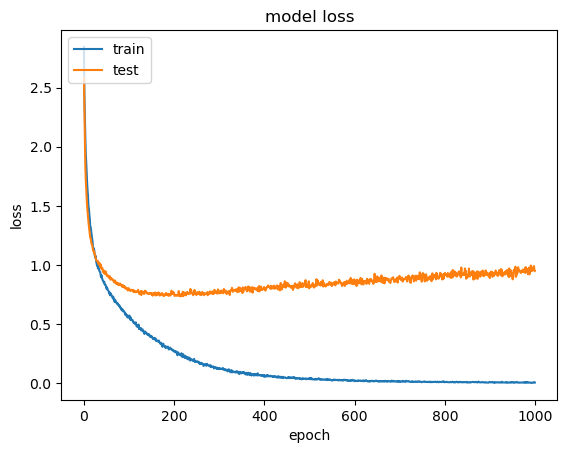

In [134]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size=32, epochs=1000, validation_data=(x_testcnn, y_test))
# cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [135]:
#Se guarda el modelo y valores entrenados en el archivo "Emotion_Voice_Detection_Model.h5":
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at c:\Users\diego\Desktop\testnotebook\Speech-Emotion-Analyzer\saved_models\Emotion_Voice_Detection_Model.h5 


In [137]:
#Se guarda la arquitectura del modelo en el archivo "model.json":
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Se carga el modelo obtenido

In [138]:
# Se carga y crea el modelo desde el archivo "model.json":
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Se cargan las métricas en el modelo:
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
compile_metrics: 77.15%


## Proceso de predicción de emociones mediante los datos de Test

In [139]:
#Se realizan predicciones sobre el conjunto de datos:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [140]:
preds

array([[4.9451821e-05, 4.9117737e-04, 1.4972559e-02, ..., 3.6485544e-03,
        3.8051014e-04, 1.7249769e-02],
       [3.8898645e-07, 1.0057551e-08, 6.0050533e-09, ..., 2.5359176e-10,
        9.0699719e-11, 6.7920103e-10],
       [9.8827268e-06, 2.1103306e-05, 1.0886005e-03, ..., 3.8686180e-06,
        1.9228241e-06, 1.1147769e-05],
       ...,
       [8.2368540e-05, 1.0011404e-04, 4.4773408e-04, ..., 1.2554385e-06,
        3.0115884e-06, 8.4111452e-06],
       [3.4902263e-03, 1.2673375e-01, 1.6704713e-03, ..., 5.2692783e-03,
        1.5805349e-02, 1.7132220e-04],
       [8.7512708e-06, 2.8333630e-05, 4.6274026e-06, ..., 2.4992958e-06,
        1.5169912e-06, 1.3060159e-06]], dtype=float32)

In [142]:
#Se determina la clase con la mayor probabilidad para cada muestra:
preds1=preds.argmax(axis=1)

In [143]:
preds1

array([ 9,  3,  3, 11,  0,  6,  3,  6,  4,  4,  0,  2,  1,  3,  2,  3,  5,
        2, 12,  0,  4,  2,  5,  0,  4, 13,  0,  4, 12,  0,  0,  1,  3,  3,
        0,  5,  5,  4,  5,  6,  6,  6,  4,  0,  1,  3,  2,  2,  5,  6,  0,
       12,  5,  6,  5,  1, 10,  3,  2,  5,  4,  7,  6,  1, 12,  6,  3,  2,
        6,  3,  1,  8,  5,  0,  6,  1,  4,  2,  4,  4,  8,  3,  4,  1,  2,
       10,  4,  8,  4, 11,  4,  1,  5, 10,  1,  1,  5,  2,  5,  6,  5,  6,
       12,  4,  9,  4,  6,  0, 10,  6,  6,  2,  8, 11,  5,  5,  2,  2,  5,
        1, 12,  3,  5,  3,  1,  3,  6,  3, 11,  3,  3,  1,  4,  6,  4,  6,
        3,  8,  3,  6,  7,  0,  9,  5,  2,  8,  2,  1,  5,  0,  4,  5,  5,
        4, 10,  3,  0,  6,  3,  2,  6,  3,  5,  6, 12,  6,  7,  4,  0, 11,
        1,  5,  3,  6,  4,  4,  1, 11,  2,  5,  4,  7,  0,  4,  0,  4,  0,
        1,  8,  2, 12,  9,  4,  6,  0,  3,  4,  6,  9,  3, 12,  0,  2, 12,
        5,  1,  3, 12,  0,  3, 11,  4,  5, 10,  9,  0,  3,  9, 11,  3,  2,
        4,  2, 13,  5,  8

In [144]:
#Se asegura que todos los elementos de "preds1" sean de tipo entero y se reconvierte en un arreglo unidimensional:
abc = preds1.astype(int).flatten()

In [145]:
#Se reconvierten los índices de clases predichos "abc" a las etiquetas originales:
predictions = (lb.inverse_transform((abc)))

In [147]:
#Se crea un DataFrame con las predicciones del modelo:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:827]

,predictedvalues
0,male_fearful
1,female_happy
2,female_happy
3,male_neutral
4,female_angry
...,...
822,female_neutral
823,male_neutral
824,female_happy
825,female_neutral


In [148]:
#Se toman las etiquetas reales del conjunto de datos de prueba, se convierten en sus valores originales y se almacenan:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [149]:
#Se crea un DataFrame que contiene las etiquetas reales del conjunto de datos de test:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:827]

,actualvalues
0,male_fearful
1,female_happy
2,female_happy
3,male_disgust
4,female_angry
...,...
822,female_neutral
823,male_neutral
824,female_happy
825,female_sad


In [150]:
#Se combinan los dos dataframes:
finaldf = actualdf.join(preddf)

## Comparativa de los valores Actual vs Predictivo de las emociones

In [152]:
finaldf[:827]

,actualvalues,predictedvalues
0,male_fearful,male_fearful
1,female_happy,female_happy
2,female_happy,female_happy
3,male_disgust,male_neutral
4,female_angry,female_angry
...,...,...
822,female_neutral,female_neutral
823,male_neutral,male_neutral
824,female_happy,female_happy
825,female_sad,female_neutral


In [153]:
#Se agrupa y muestra cuántas veces aparece cada valor único real:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,99
female_disgust,92
female_fearful,88
female_happy,88
female_neutral,111
female_sad,103
female_surprised,104
male_angry,14
male_disgust,24


In [154]:
#Se agrupa y muestra cuántas veces aparece cada valor único predicho:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,102
female_disgust,84
female_fearful,77
female_happy,111
female_neutral,114
female_sad,102
female_surprised,103
male_angry,8
male_disgust,14


In [155]:
#Se guarda el dataframe comparativo en el archivo "predictions.csv":
finaldf.to_csv('Predictions.csv', index=False)